In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split           
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
import os
train_df = pd.read_csv(r"C:/Users/Aditi/Desktop/projects/MoodStar/emotions_dataset/training.csv")
val_df = pd.read_csv(r"C:/Users/Aditi/Desktop/projects/MoodStar/emotions_dataset/validation.csv")
df = pd.concat([train_df, val_df], ignore_index=True)
print(df.head())



                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [55]:

df = df.dropna()
df['text'] = df['text'].str.lower().str.strip()
X = df['text']
y = df['label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_val_vec)
print(" Classification Report:")
print(classification_report(y_val, y_pred))
print(" Accuracy:", round(accuracy_score(y_val, y_pred) * 100, 2), "%")
os.makedirs("../model", exist_ok=True)
joblib.dump(model, "../model/mood_model.pkl")
joblib.dump(vectorizer, "../model/vectorizer.pkl")

print(" Model and vectorizer saved successfully")

 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1092
           1       0.81      0.96      0.88      1176
           2       0.86      0.62      0.72       318
           3       0.92      0.78      0.84       462
           4       0.85      0.74      0.79       415
           5       0.88      0.50      0.64       137

    accuracy                           0.86      3600
   macro avg       0.87      0.75      0.80      3600
weighted avg       0.86      0.86      0.85      3600

 Accuracy: 85.53 %
 Model and vectorizer saved successfully


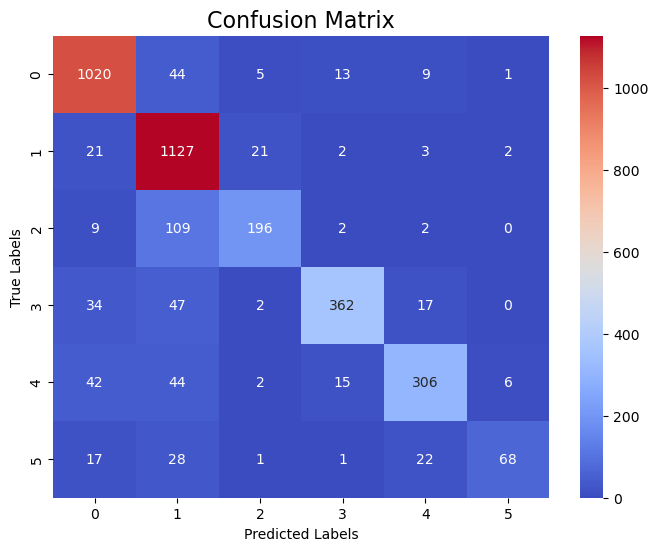

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred = model.predict(X_val_vec)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
